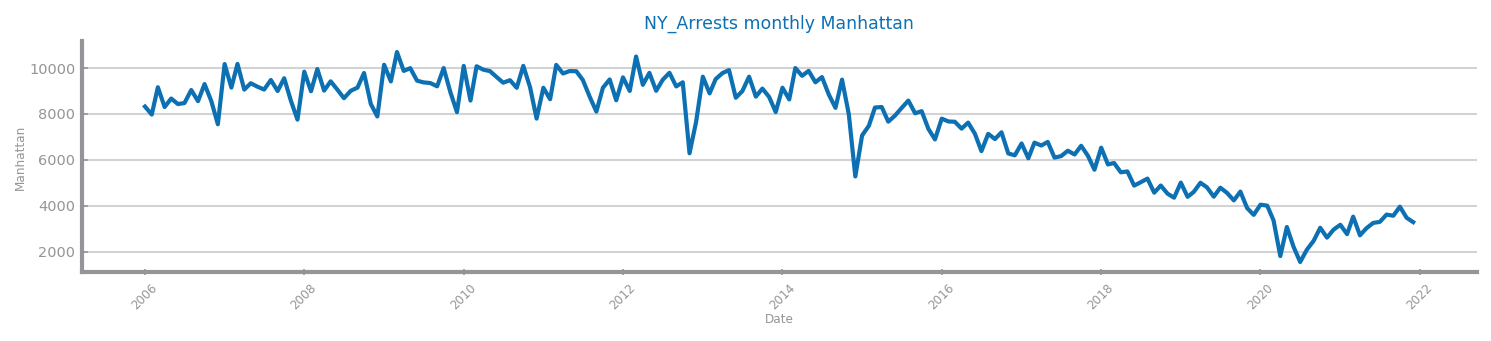

In [14]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# File details
file_tag = "NY_Arrests"
filename = "/Users/tomifemme/Desktop/DataScience/Projeto/TimeSeries/Transformation/Transformed_monthly_multivariate_data.csv"
index = "Date"
target = "Manhattan"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=";",  # Semicolon-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Date column
    infer_datetime_format=True,
)
data.set_index(index, inplace=True)

# Extract the Manhattan series
series: Series = data[target]

# Visualize the original series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} monthly {target}",
)
show()


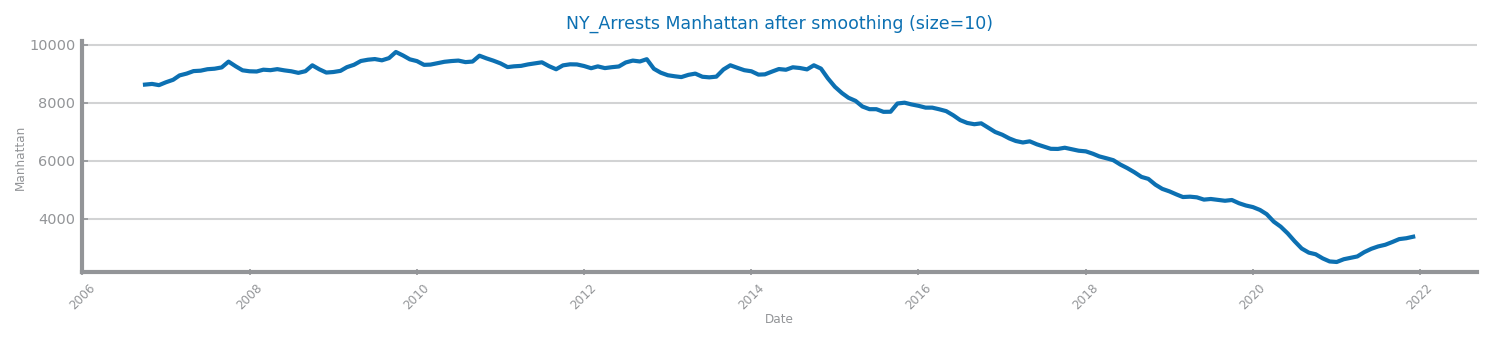

In [15]:
# Apply smoothing with a rolling window
WIN_SIZE = 10
ss_smooth: Series = series.rolling(window=WIN_SIZE).mean()

# Plot the smoothed series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_smooth.index.to_list(),
    ss_smooth.to_list(),
    xlabel=ss_smooth.index.name,
    ylabel=target,
    title=f"{file_tag} {target} after smoothing (size={WIN_SIZE})",
)
show()


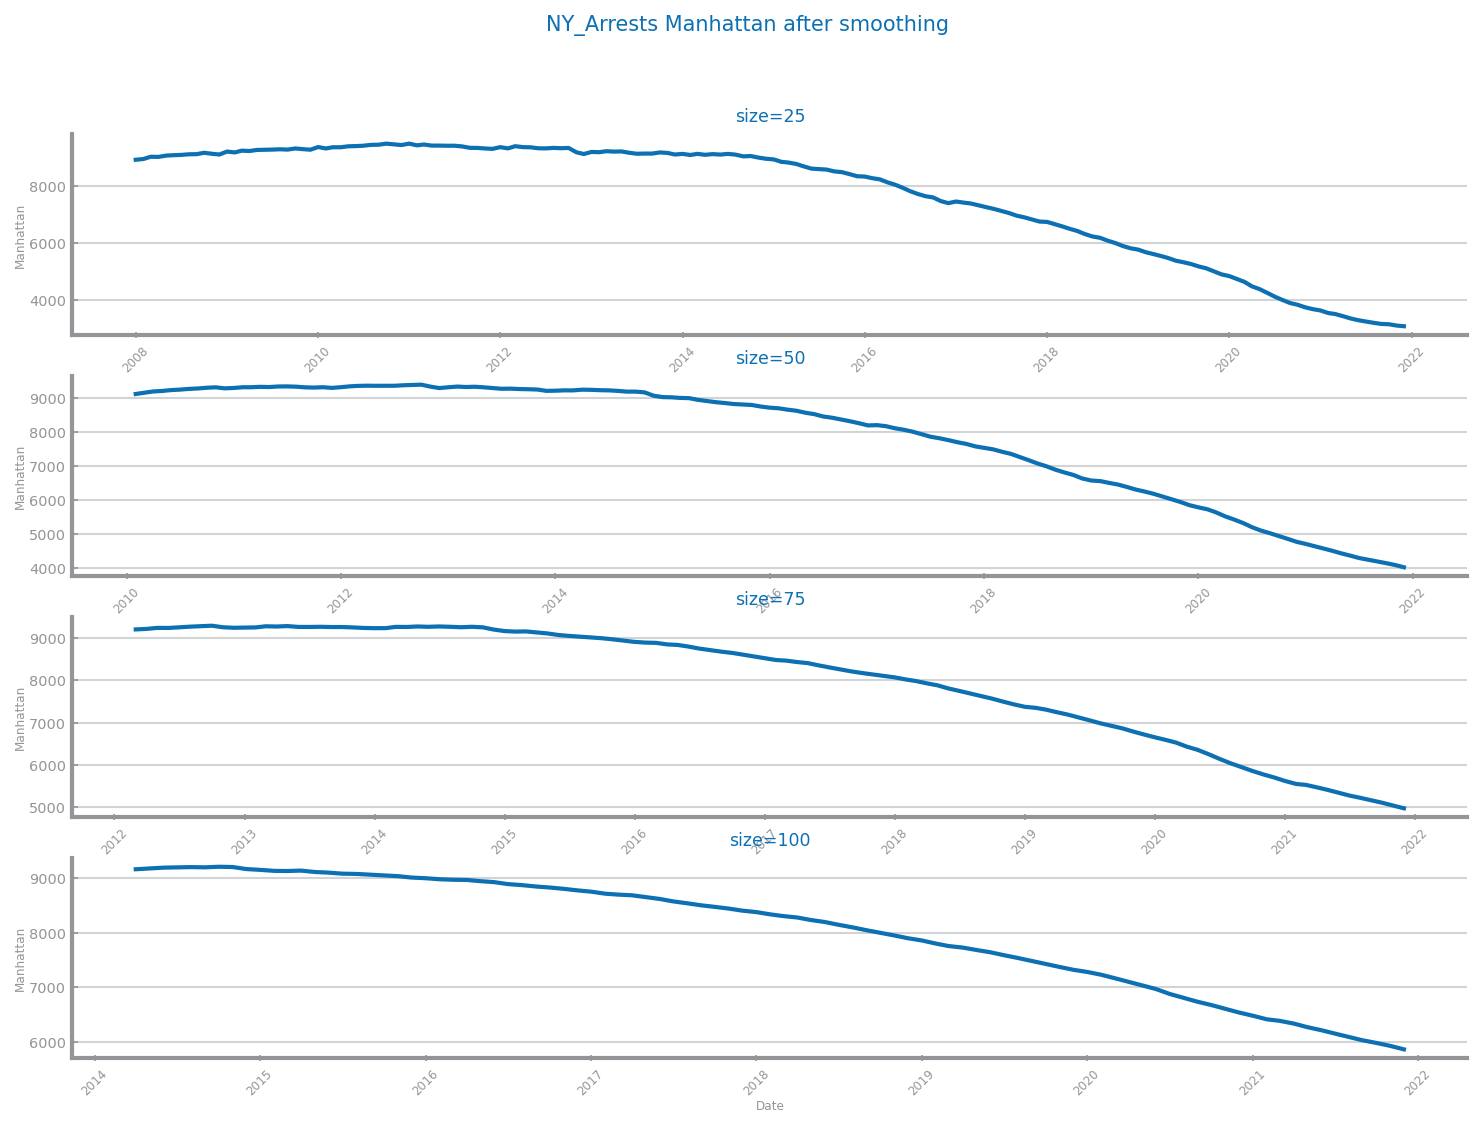

In [16]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

# Define different window sizes
sizes: list[int] = [25, 50, 75, 100]

# Create subplots
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(sizes), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} {target} after smoothing")

# Apply smoothing for each window size and plot
for i in range(len(sizes)):
    ss_smooth: Series = series.rolling(window=sizes[i]).mean()
    plot_line_chart(
        ss_smooth.index.to_list(),
        ss_smooth.to_list(),
        ax=axs[i],
        xlabel=ss_smooth.index.name,
        ylabel=target,
        title=f"size={sizes[i]}",
    )

# Show the plots
show()


In [ ]:
# Define the filenames for the smoothed data
filenames = [f"{file_tag}_smoothed_{size}.csv" for size in sizes]

# Save the smoothed series for each window size
for size, filename in zip(sizes, filenames):
    smoothed_data = data.copy()
    smoothed_data[target] = data[target].rolling(window=size).mean().dropna()
    smoothed_data.dropna().to_csv(filename, header=True)

print("Smoothed data saved to CSV files:", filenames)


Smoothed data saved to CSV files: ['NY_Arrests_smoothed_25.csv', 'NY_Arrests_smoothed_50.csv', 'NY_Arrests_smoothed_75.csv', 'NY_Arrests_smoothed_100.csv']
